In [1]:
import import_ipynb
import csv
import c1_extract_paragraphe_issue as c1
import c2_extract_sentence_issue as c2
import matplotlib.pyplot as plt

importing Jupyter notebook from c1_extract_paragraphe_issue.ipynb
Issue  34
importing Jupyter notebook from c2_extract_sentence_issue.ipynb


In [3]:
def extract_from_csv_list_issues(csv_file):
    """ Extract from "csv_file" all the html link to be able to extract all the <p> tags. """
    f = open(csv_file)
    csv_f = csv.reader(f)
    list_pt = []
    l =list(csv_f)[1:]
    issue = []
    for x in l:
        if(x[7] =='Issue'):
            issue.append(int(x[4]))
    return issue


In [4]:
list_issues = extract_from_csv_list_issues('Text/list_meetings.csv')
num_words = []
num_sentences = []
for i in list_issues:
    list_paragraphes = c1.extract_paragraphes_from_issue(i)
    x = ' '
    paragraphes = x.join(list_paragraphes)

    if(len(paragraphes.split()) != 0):
        num_sentences.append((i, len(c2.extract_from_txt_sentences(list_paragraphes))))
        num_words.append((i,len(paragraphes.split())))
        if(len(paragraphes.split()) > 30000):
            print(i)


Issue  1
Issue  2
Issue  3
Issue  4
Issue  5
Issue  6
Issue  7
Issue  8
Issue  9
Issue  10
Issue  13
Issue  14
Issue  15
Issue  16
Issue  17
Issue  18
Issue  19
Issue  20
Issue  29
Issue  30
Issue  31
Issue  32
Issue  33
Issue  34
Issue  35
Issue  36
Issue  37
Issue  42
Issue  43
Issue  44
Issue  47
Issue  48
Issue  51
Issue  52
Issue  53
Issue  54
Issue  57
Issue  58
Issue  59
Issue  60
Issue  61
Issue  62
Issue  63
Issue  64
Issue  65
Issue  68
Issue  69
Issue  70
Issue  71
Issue  72
Issue  73
Issue  74
Issue  75
Issue  78
Issue  79
Issue  80
Issue  81
Issue  82
Issue  83
Issue  84
Issue  85
Issue  88
Issue  89
Issue  90
Issue  91
Issue  92
Issue  93
Issue  94
Issue  95
Issue  96
Issue  100
Issue  101
Issue  102
Issue  103
Issue  104
Issue  105
Issue  106
Issue  107
Issue  108
Issue  109
Issue  113
Issue  114
Issue  115
Issue  116
Issue  117
Issue  118
Issue  119
Issue  120
Issue  121
Issue  122
Issue  128
Issue  129
Issue  130
Issue  131
Issue  132
Issue  133
Issue  134
Issue  135
I

In [13]:
num_words = [n for i,n in num_words]
num_1500 = [n for n in num_words if n>=1500 and n <=2000]

TypeError: cannot unpack non-iterable int object

In [28]:
import numpy as np
print(min(num_words))

823


In [26]:
num_1500 = len([n for n in num_words if n>=1500 and n <=3000])
print(num_1500)

443


In [ ]:
655.3765
2139.60

In [8]:
def plot_corr_coeff(x,y):
    """Plot all the coefficient of correlations"""
    figsize = (16,9)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    csfont = {'fontname':'Helvetica','fontsize':'18' }
    hfont = {'fontname':'Helvetica','fontsize':'14'}
    plt.title('Number of words for each reports collected',**csfont)
    plt.xlabel('Reports ordered by reference', **hfont)
    plt.ylabel('Number of words', **hfont)
    plt.scatter(x,y)
    plt.show()

In [11]:
import collections
from scipy.stats import pareto
def node_degree_distribution(num_words):
    degree_sequence = sorted(num_words, reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    """Plot the distribution of node degrees"""
    figsize = (20,10)
    fig, axe = plt.subplots(1, 1, figsize=figsize)
    #axe.set_xscale('log')
    csfont = {'fontname':'Helvetica','fontsize':'18' }
    hfont = {'fontname':'Helvetica','fontsize':'14'}
    plt.title('Distribution of the number of words per documents',**csfont)
    plt.xlabel('Number of words', **hfont)
    plt.ylabel('Number of of documents', **hfont)
    plt.plot(deg,cnt)

    plt.show()


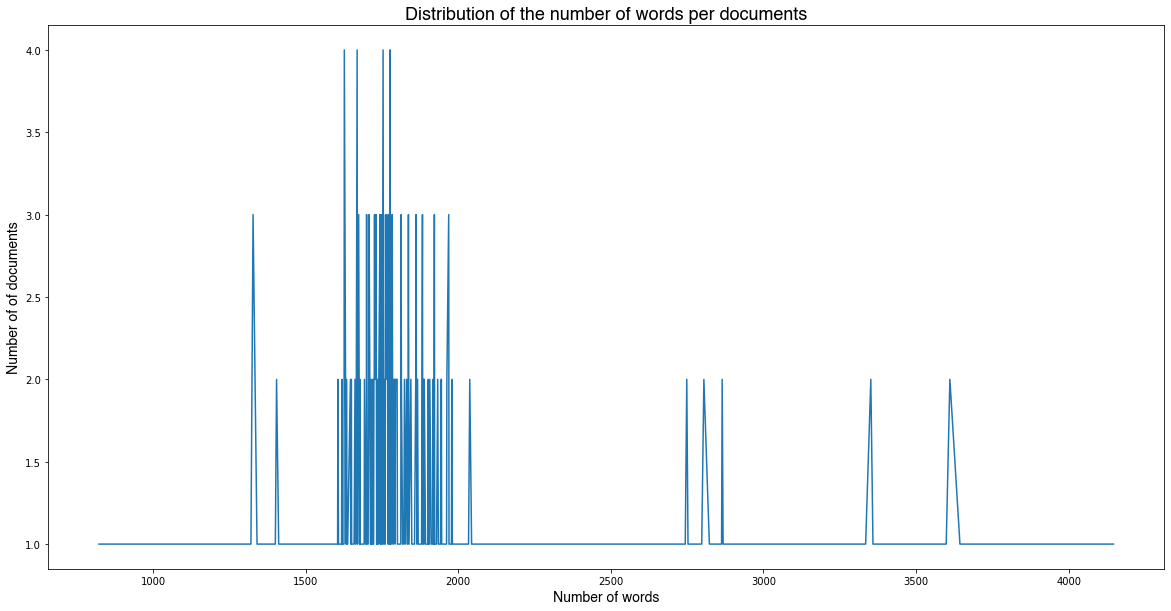

In [12]:
node_degree_distribution(num_words)